# Veri

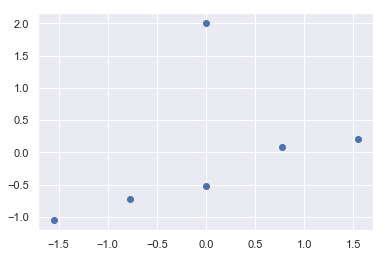

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X = np.array([
    [1,4],
    [2,9],
    [3,12],
    [4,21],
    [5,23],
    [3,50]
])

# standardization
X_normal = (X - X.mean(axis = 0))/(X.std(axis = 0))
plt.plot(X_normal[:,0], X_normal[:,1], 'o')

# El yapimi PCA

In [11]:
COV = X_normal.T.dot(X_normal)
ozdegerler, ozvektorler = np.linalg.eig(COV)

ozvektorler_tersi = np.linalg.inv(ozvektorler)
ozdegerler = ozdegerler/4

print("Maksimize etmek istedigimiz varyans")
print((1/4) * ozvektorler_tersi.dot(COV).dot(ozvektorler))

w1,w2 = ozvektorler[:,0], ozvektorler[:,1]
print("\nOzvektor 1 : Temel Bilesen 1")
print(w1)
print("Ozdeger 1: {}".format(ozdegerler[0]))

print("\nOzvektor 2 : Temel Bilesen 2")
print(w2)
print("Ozdeger 2: {}".format(ozdegerler[1]))

Maksimize etmek istedigimiz varyans
[[2.14529809e+00 2.22044605e-16]
 [1.11022302e-16 8.54701911e-01]]

Ozvektor 1 : Temel Bilesen 1
[0.70710678 0.70710678]
Ozdeger 1: 2.1452980890170688

Ozvektor 2 : Temel Bilesen 2
[-0.70710678  0.70710678]
Ozdeger 2: 0.8547019109829314


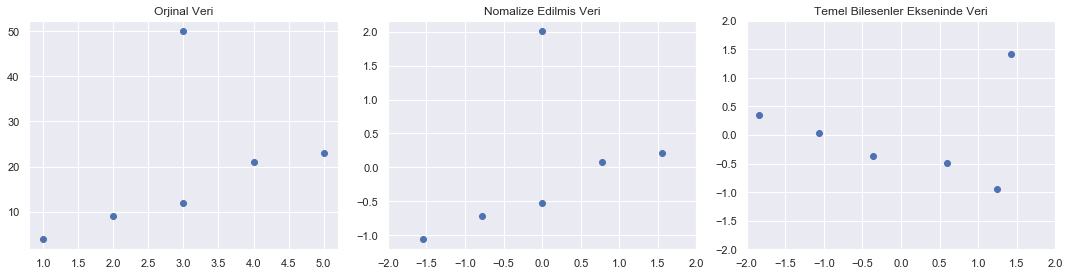

In [12]:
X_donus = X_normal.dot(ozvektorler) 

fig = plt.figure(figsize = (15,4))

plt.subplot(1, 3, 1)
plt.plot(X[:,0], X[:,1], 'o')
plt.title('Orjinal Veri')

plt.subplot(1, 3, 2)
plt.plot(X_normal[:,0], X_normal[:,1], 'o')
plt.title('Nomalize Edilmis Veri')
#plt.ylim((-2,2))
plt.xlim((-2,2))

plt.subplot(1, 3, 3)
plt.plot(X_donus[:,0], X_donus[:,1], 'o')
plt.title('Temel Bilesenler Ekseninde Veri')
plt.ylim((-2,2))
plt.xlim((-2,2))

plt.tight_layout()

# Normal Uzayda veri

In [14]:
X_N = X_normal.dot(ozvektorler[:,0]) 
X_N

array([-1.84160535, -1.05825324, -0.36915296,  0.60270279,  1.24467716,
        1.4216316 ])

In [16]:
np.std(X_N)

1.1959091629431473

# Anomali Uzayinda veri

In [15]:
X_A = X_normal.dot(ozvektorler[:,1]) 
X_A

array([ 0.34928488,  0.03719187, -0.36915296, -0.49274233, -0.94621307,
        1.4216316 ])

In [17]:
np.std(X_A)

0.7548518225377884

# Sklearn PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_normal)

for eigenvalue, eigenvector in zip(pca.explained_variance_, pca.components_):
    print("\neigenvalue: {}".format(eigenvalue))
    print(eigenvector)
    print("eigenvector length: {}".format(eigenvector.dot(eigenvector.T)))


eigenvalue: 1.716238471213655
[-0.70710678 -0.70710678]
eigenvector length: 0.9999999999999998

eigenvalue: 0.6837615287863448
[-0.70710678  0.70710678]
eigenvector length: 0.9999999999999998


In [19]:
pca.explained_variance_ / np.sum(pca.explained_variance_)

array([0.71509936, 0.28490064])

In [20]:
PC1 = pca.components_[0]
PC2 = pca.components_[1]

# Scalar Projection

In [21]:
izdusum1 = X_normal.dot(PC1)
print(izdusum1)

[ 1.84160535  1.05825324  0.36915296 -0.60270279 -1.24467716 -1.4216316 ]


In [25]:
np.std(izdusum1)

1.195909162943147

In [22]:
izdusum2 = X_normal.dot(PC2)
print(izdusum2)

[ 0.34928488  0.03719187 -0.36915296 -0.49274233 -0.94621307  1.4216316 ]


In [24]:
np.std(izdusum2)

0.7548518225377883

In [28]:
X_normal

array([[-1.54919334, -1.05522992],
       [-0.77459667, -0.72199942],
       [ 0.        , -0.52206112],
       [ 0.77459667,  0.07775378],
       [ 1.54919334,  0.21104598],
       [ 0.        ,  2.01049069]])

# Vectorel Projection

In [29]:
PC1

array([-0.70710678, -0.70710678])

In [31]:
izdusum1.shape, PC1.shape

((6,), (2,))

In [32]:
izdusum1.reshape(6,1) * PC1.reshape(1,2)

array([[-1.30221163, -1.30221163],
       [-0.74829804, -0.74829804],
       [-0.26103056, -0.26103056],
       [ 0.42617523,  0.42617523],
       [ 0.88011966,  0.88011966],
       [ 1.00524534,  1.00524534]])

## veri = Anomali uzayina olan izdusum + normal uzaya olan izdusum

burada bahsedilen scalar izdusum degil, vektorel izdusumdur.

<img src="resim/anomali_tespiti.JPG" alt="izdusumu" width="600">

In [37]:
normal_uzay = izdusum1.reshape(6,1) * PC1.reshape(1,2)
normal_uzay

array([[-1.30221163, -1.30221163],
       [-0.74829804, -0.74829804],
       [-0.26103056, -0.26103056],
       [ 0.42617523,  0.42617523],
       [ 0.88011966,  0.88011966],
       [ 1.00524534,  1.00524534]])

In [38]:
anomali_uzay = izdusum2.reshape(6,1) * PC2.reshape(1,2)
anomali_uzay

array([[-0.24698171,  0.24698171],
       [-0.02629863,  0.02629863],
       [ 0.26103056, -0.26103056],
       [ 0.34842144, -0.34842144],
       [ 0.66907368, -0.66907368],
       [-1.00524534,  1.00524534]])

In [39]:
X_normal

array([[-1.54919334, -1.05522992],
       [-0.77459667, -0.72199942],
       [ 0.        , -0.52206112],
       [ 0.77459667,  0.07775378],
       [ 1.54919334,  0.21104598],
       [ 0.        ,  2.01049069]])

In [40]:
anomali_uzay + normal_uzay

array([[-1.54919334, -1.05522992],
       [-0.77459667, -0.72199942],
       [ 0.        , -0.52206112],
       [ 0.77459667,  0.07775378],
       [ 1.54919334,  0.21104598],
       [ 0.        ,  2.01049069]])

# anomali tespiti

In [41]:
anomali_uzay

array([[-0.24698171,  0.24698171],
       [-0.02629863,  0.02629863],
       [ 0.26103056, -0.26103056],
       [ 0.34842144, -0.34842144],
       [ 0.66907368, -0.66907368],
       [-1.00524534,  1.00524534]])

In [47]:
uzunluk = np.sum(anomali_uzay**2, axis = 1)**0.5
uzunluk

array([0.34928488, 0.03719187, 0.36915296, 0.49274233, 0.94621307,
       1.4216316 ])

In [48]:
uzunluk > 0.001

array([ True,  True,  True,  True,  True,  True])

# Incremental PCA
 - Online Learning

In [66]:
from sklearn.decomposition import IncrementalPCA

X1 = X_normal[:3,:]

In [67]:
X1

array([[-1.54919334, -1.05522992],
       [-0.77459667, -0.72199942],
       [ 0.        , -0.52206112]])

In [68]:
X2 = X_normal[3:,:]
X2

array([[0.77459667, 0.07775378],
       [1.54919334, 0.21104598],
       [0.        , 2.01049069]])

In [69]:
transformer = IncrementalPCA(n_components=2)
transformer.partial_fit(X1)

IncrementalPCA(batch_size=None, copy=True, n_components=2, whiten=False)

In [70]:
X_transformed = transformer.fit_transform(X1)

In [71]:
X_transformed

array([[-0.82643048, -0.0204441 ],
       [ 0.01448747,  0.04200242],
       [ 0.81194302, -0.02155833]])

In [72]:
transformer.partial_fit(X2)

IncrementalPCA(batch_size=None, copy=True, n_components=2, whiten=False)

In [74]:
X_transformed = transformer.fit_transform(X_normal)
X_transformed

array([[-1.84160535, -0.34928488],
       [-1.05825324, -0.03719187],
       [-0.36915296,  0.36915296],
       [ 0.60270279,  0.49274233],
       [ 1.24467716,  0.94621307],
       [ 1.4216316 , -1.4216316 ]])

In [75]:
X_donus

array([[-1.84160535,  0.34928488],
       [-1.05825324,  0.03719187],
       [-0.36915296, -0.36915296],
       [ 0.60270279, -0.49274233],
       [ 1.24467716, -0.94621307],
       [ 1.4216316 ,  1.4216316 ]])